Enter the componenets required:3


<Figure size 432x432 with 0 Axes>

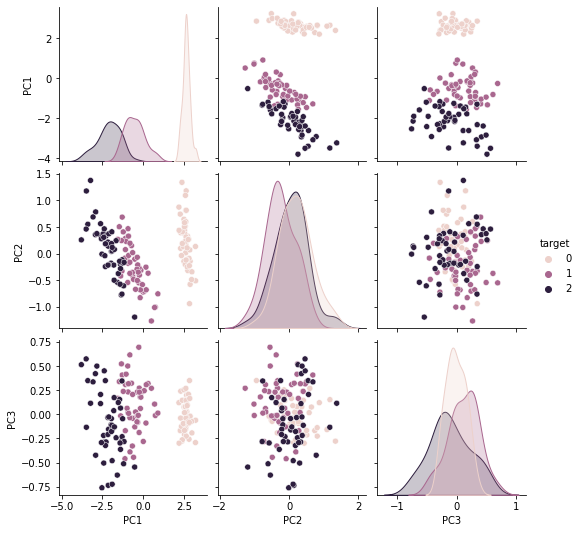

In [10]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import datasets


def PCA(X, num_components):
    X_meaned = X - np.mean(X, axis = 0) #150*4
    cov_mat = np.cov(X_meaned, rowvar = False)#4*4
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
    
   # print(eigen_vectors)
    sorted_index = np.argsort(eigen_values)[::-1]

   # sorted_eigenvalue = eigen_values[sorted_index]
    
    sorted_eigenvectors = eigen_vectors[:, sorted_index]

    eigenvector_subset = sorted_eigenvectors[:, 0:num_components]
                                                      
    #Projecting the larger dimension along the reduced dimension subspace 
    #3*4 and 4*150 matrix-dimension
    X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose())
    
    return X_reduced.transpose()


iris = datasets.load_iris()
data =pd.DataFrame(iris.data,columns=iris.feature_names)
x = iris.data
target = iris.target


n=int(input("Enter the componenets required:"))

mat_reduced = PCA(x, n)

s='PC'
cols=[]
for i in range(0,n):
    cols.insert(i,s+str(i+1))
    
principal_df = pd.DataFrame(mat_reduced,columns=cols)


principal_df = pd.concat([principal_df, pd.DataFrame(target,columns=['target'])],axis = 1)



plt.figure(figsize = (6,6))
sb.pairplot(principal_df,hue='target')

In [64]:
data


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
